# 2. M/L

In [5]:
import pandas as pd

data = pd.read_csv('./CVD_cleaned.csv')
data

health=data.copy()

### 데이터 전처리

In [6]:

# Diabetes 컬럼
health['Diabetes'] = health['Diabetes'].replace('Yes, but female told only during pregnancy', 'Yes')
health['Diabetes'] = health['Diabetes'].replace('No, pre-diabetes or borderline diabetes', 'No')



# Age 컬럼
age_range = []

for idx, row in health.iterrows():
    
        if row['Age_Category'][0]=='1' or row['Age_Category'][0]=='2':
            tmp = "20's"
        elif row['Age_Category'][0] == '3':
            tmp = "30's"
        elif row['Age_Category'][0] == '4':
            tmp = "40's"
        elif row['Age_Category'][0] == '5':
            tmp = "50's"
        elif row['Age_Category'][0] == '6':
            tmp = "60's"
        elif row['Age_Category'][0] == '7':
            tmp = "70's"
        else:
            tmp = "80+"
        
        age_range.append(tmp)

health['Age_Range'] = age_range




# BMI 컬럼
BMI_range = []

for idx, row in health.iterrows():
    if row['BMI'] < 18.5:
        tmp = 'Underweight'
    elif row['BMI'] >= 18.5 and row['BMI'] < 25:
        tmp = 'Nomal Weight'
    elif row['BMI'] >= 25 and row['BMI'] < 30:
        tmp = 'Over Weight'
    elif row['BMI'] >= 30 and row['BMI'] < 35:
        tmp = 'Obesity class 1'
    elif row['BMI'] >= 35 and row['BMI'] < 40:
        tmp = 'Obesity class 2'
    else:
        tmp = 'Obesity class 3'
        
    BMI_range.append(tmp)

health['BMI_Range'] = BMI_range




# 과일섭취 + 채소섭취
health['Vegetables_Fruit_Consumption'] = health['Green_Vegetables_Consumption'] + health['Fruit_Consumption']


health.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_Range,BMI_Range,Vegetables_Fruit_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,32.66,14.54,Yes,0.0,30.0,16.0,12.0,70's,Underweight,46.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,77.11,28.29,No,0.0,30.0,0.0,4.0,70's,Over Weight,30.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,88.45,33.47,No,4.0,12.0,3.0,16.0,60's,Obesity class 1,15.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,93.44,28.73,No,0.0,30.0,30.0,8.0,70's,Over Weight,60.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,88.45,24.37,Yes,0.0,8.0,4.0,0.0,80+,Nomal Weight,12.0


- 분석에 사용할 컬럼들(1차)
    - General_Health
    - Checkup
    - Alcohol_Consumption
    - FriedPotato_Consumption
    - Age_Range
    - BMI_Range (키와 몸무게 컬럼은 BMI로 계산되므로 생략함)
    - Vegetables_Fruit_Consumption


In [7]:
health.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Age_Range',
       'BMI_Range', 'Vegetables_Fruit_Consumption'],
      dtype='object')

### 데이터 라벨링

In [8]:
heart = health.copy()

In [10]:
heart = heart[['General_Health', 'Checkup',  'Age_Range', 'BMI_Range', 'Alcohol_Consumption', 'FriedPotato_Consumption','Vegetables_Fruit_Consumption', 'Heart_Disease']]
heart.head()

,General_Health,Checkup,Age_Range,BMI_Range,Alcohol_Consumption,FriedPotato_Consumption,Vegetables_Fruit_Consumption,Heart_Disease
0,Poor,Within the past 2 years,70's,Underweight,0.0,12.0,46.0,No
1,Very Good,Within the past year,70's,Over Weight,0.0,4.0,30.0,Yes
2,Very Good,Within the past year,60's,Obesity class 1,4.0,16.0,15.0,No
3,Poor,Within the past year,70's,Over Weight,0.0,8.0,60.0,Yes
4,Good,Within the past year,80+,Nomal Weight,0.0,0.0,12.0,No


In [11]:
# 라벨링 해야 할 범주형 데이터 목록

print('General_Health : ', heart['General_Health'].unique())
print('Checkup : ', heart['Checkup'].unique())
print('Age_Range : ', heart['Age_Range'].unique())
print('BMI_Range : ', heart['BMI_Range'].unique())
print('Heart_Disease : ', heart['Heart_Disease'].unique())


General_Health :  ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup :  ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Age_Range :  ["70's" "60's" '80+' "50's" "40's" "20's" "30's"]
BMI_Range :  ['Underweight' 'Over Weight' 'Obesity class 1' 'Nomal Weight'
 'Obesity class 3' 'Obesity class 2']
Heart_Disease :  ['No' 'Yes']


In [12]:
heart['General_Health'] = heart['General_Health'].map({'Poor': 0, 'Fair': 1, 'Good':2, 'Very Good':3, 'Excellent':4})

heart['Checkup'] = heart['Checkup'].map({'Never':0, '5 or more years ago':1, 'Within the past 5 years':2,
                                          'Within the past 2 years':3, 'Within the past year':4})

heart['Age_Range'] = heart['Age_Range'].map({"20's": 0, "30's": 1, "40's":2, "50's":3, "60's":4, "70's":5, "80+":6})

heart['BMI_Range'] = heart['BMI_Range'].map({'Underweight': 0, 'Nomal Weight': 1, 'Over Weight':2, 
                                             'Obesity class 1':3, 'Obesity class 2':4, 'Obesity class 3':5})

heart['Heart_Disease'] = heart['Heart_Disease'].map({'Yes': 1, 'No': 0})

heart.head()

,General_Health,Checkup,Age_Range,BMI_Range,Alcohol_Consumption,FriedPotato_Consumption,Vegetables_Fruit_Consumption,Heart_Disease
0,0,3,5,0,0.0,12.0,46.0,0
1,3,4,5,2,0.0,4.0,30.0,1
2,3,4,4,3,4.0,16.0,15.0,0
3,0,4,5,2,0.0,8.0,60.0,1
4,2,4,6,1,0.0,0.0,12.0,0


---

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, 
                             auc, precision_recall_curve, accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, ConfusionMatrixDisplay)

from sklearn.model_selection import learning_curve

In [26]:
# 분류기 성능 return
def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

# 성능 출력
def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print('=> confusion matrix')
    print(confusion)
    print('======================')

    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC: {2:.4f}'.format(re, f1, auc))

# 모델과 데이터를 주면 성능 출력
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

# 다수의 모델의 성능을 정리해어 df으로 반환
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

import matplotlib.pyplot as plt

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10, 10))

    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])

    plt.plot([0, 1], [0, 1], 'k--', label='random guess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

---

In [92]:
# Data Split

X = heart.drop("Heart_Disease", axis = 1)
y = heart['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56777
           1       0.00      0.00      0.00      4994

    accuracy                           0.92     61771
   macro avg       0.46      0.50      0.48     61771
weighted avg       0.84      0.92      0.88     61771



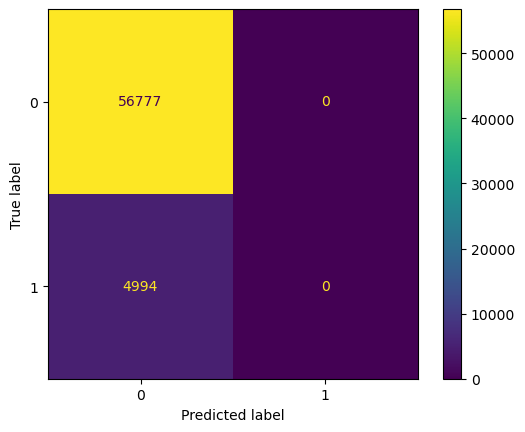

In [93]:
# Decision Tree 
dt= DecisionTreeClassifier(random_state=13, max_depth=2)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


print(classification_report(y_test, dt_pred))
cm = confusion_matrix(y_test, dt_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

---

## 첫 시도. SMOTE Over Sampling

In [71]:
smote = SMOTE(random_state=13)

X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)

#### Decision Tree

              precision    recall  f1-score   support

           0       0.97      0.72      0.82     56777
           1       0.18      0.71      0.29      4994

    accuracy                           0.72     61771
   macro avg       0.57      0.71      0.56     61771
weighted avg       0.90      0.72      0.78     61771



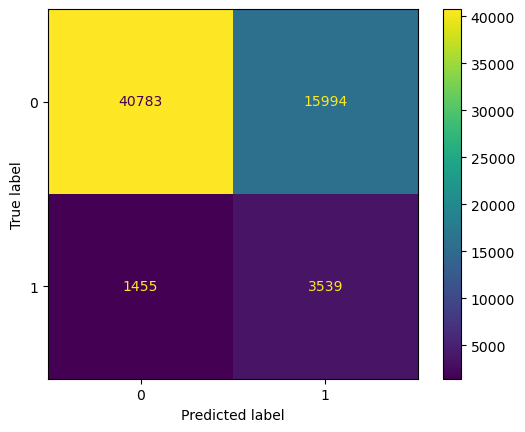

In [73]:
dt= DecisionTreeClassifier(random_state=13, max_depth=2)
dt.fit(X_train_smt, y_train_smt)
dt_pred = dt.predict(X_test)


print(classification_report(y_test, dt_pred))
cm = confusion_matrix(y_test, dt_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

- 벌써 precision 좋지 않음. 여기서 SMOTE는 그만. 다른 오버샘플링으로 전환

## 두 번째 시도. ADASYN

In [74]:
adasyn = ADASYN()
X_train_ada, y_train_ada = adasyn.fit_resample(X_train,y_train)

### Decision Tree

=> confusion matrix
[[40783 15994]
 [ 1455  3539]]
Accuracy: 0.7175, Precision: 0.1812
Recall: 0.7087, F1: 0.2886, AUC: 0.7135


=> classification_report

              precision    recall  f1-score   support

           0       0.97      0.72      0.82     56777
           1       0.18      0.71      0.29      4994

    accuracy                           0.72     61771
   macro avg       0.57      0.71      0.56     61771
weighted avg       0.90      0.72      0.78     61771



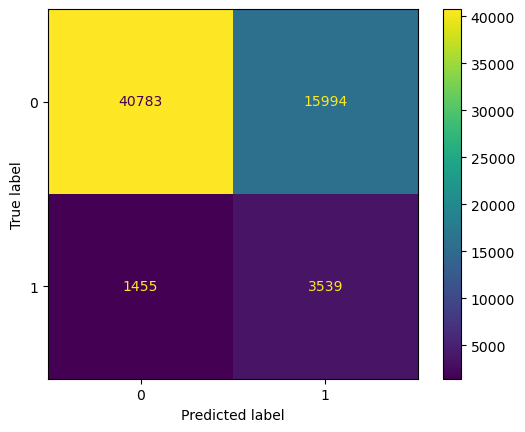

In [75]:
dt= DecisionTreeClassifier(random_state=13, max_depth=2)
dt.fit(X_train_ada, y_train_ada)
dt_pred = dt.predict(X_test)

print_clf_eval(y_test, dt_pred)

print('\n\n=> classification_report\n')
print(classification_report(y_test, dt_pred))

cm = confusion_matrix(y_test, dt_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)

disp.plot()
plt.show()

## Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     56777
           1       0.19      0.73      0.31      4994

    accuracy                           0.74     61771
   macro avg       0.58      0.73      0.57     61771
weighted avg       0.91      0.74      0.79     61771



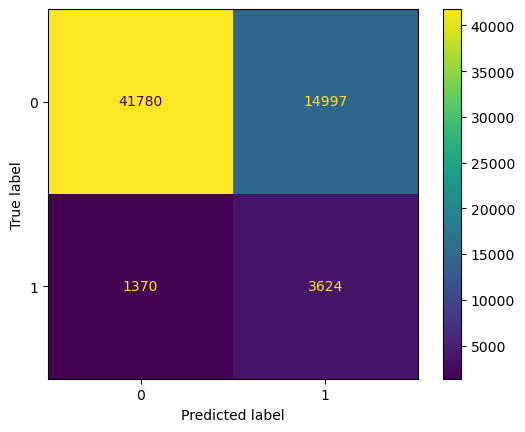

In [76]:
lr_clf = LogisticRegression(random_state=13, 
                            class_weight='balanced',
                            solver='liblinear')
lr_clf.fit(X_train_ada, y_train_ada)
lr_pred = lr_clf.predict(X_test)

print(classification_report(y_test, lr_pred))

cm = confusion_matrix(y_test, lr_pred, labels=lr_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_clf.classes_)


disp.plot()
plt.show()

### Random Forest

=> confusion matrix
[[41101 15676]
 [ 1449  3545]]
Accuracy: 0.7228, Precision: 0.1844
Recall: 0.7099, F1: 0.2928, AUC: 0.7169


=> classification_report

              precision    recall  f1-score   support

           0       0.97      0.72      0.83     56777
           1       0.18      0.71      0.29      4994

    accuracy                           0.72     61771
   macro avg       0.58      0.72      0.56     61771
weighted avg       0.90      0.72      0.78     61771



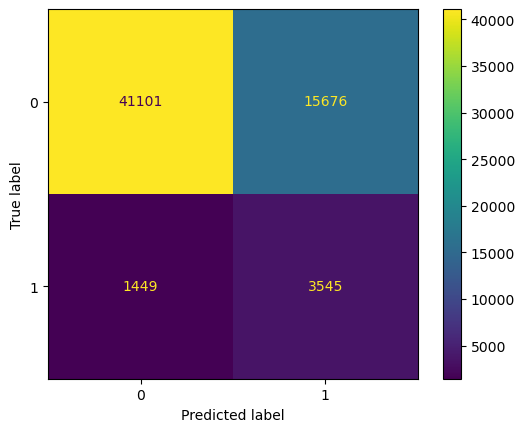

In [77]:
rf_clf = RandomForestClassifier(random_state=13, 
                                n_estimators=50,
                                max_depth=10,
                                min_samples_leaf=12,
                                min_samples_split=12,
                                n_jobs=-1,
                                class_weight='balanced')
rf_clf.fit(X_train_ada, y_train_ada)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

print('\n\n=> classification_report\n')
print(classification_report(y_test, rf_pred))

cm = confusion_matrix(y_test, rf_pred, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)

disp.plot()
plt.show()

### LGBM

[LightGBM] [Info] Number of positive: 228286, number of negative: 227106
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 455392, number of used features: 7
=> confusion matrix
[[48716  8061]
 [ 2760  2234]]
Accuracy: 0.8248, Precision: 0.2170
Recall: 0.4473, F1: 0.2922, AUC: 0.6527


=> classification_report

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56777
           1       0.22      0.45      0.29      4994

    accuracy                           0.82     61771
   macro avg       0.58      0.65      0.60     61771
weighted avg       0.89      0.82      0.85     61771



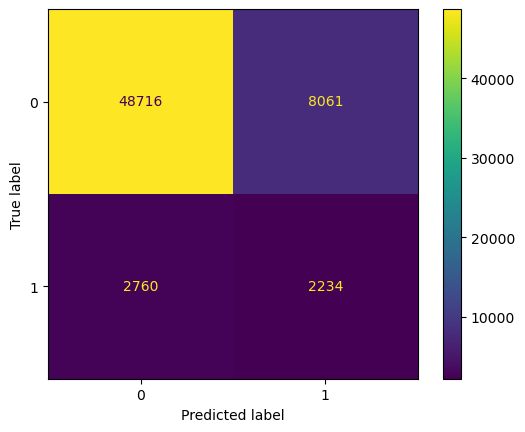

In [78]:
# LGBM
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, 
                            boost_from_average=False,
                            class_weight='balanced')
lgbm_clf.fit(X_train_ada, y_train_ada)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

print('\n\n=> classification_report\n')
print(classification_report(y_test, lgbm_pred))

cm = confusion_matrix(y_test, lgbm_pred, labels=lgbm_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm_clf.classes_)

disp.plot()
plt.show()

### XGBoost

=> confusion matrix
[[20985 35792]
 [  224  4770]]
Accuracy: 0.4169, Precision: 0.1176
Recall: 0.9551, F1: 0.2094, AUC: 0.6624


=> classification_report

              precision    recall  f1-score   support

           0       0.99      0.37      0.54     56777
           1       0.12      0.96      0.21      4994

    accuracy                           0.42     61771
   macro avg       0.55      0.66      0.37     61771
weighted avg       0.92      0.42      0.51     61771



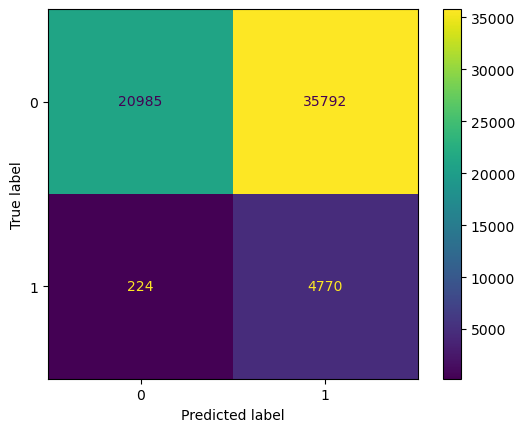

In [87]:
xgb_clf = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1),
    n_estimators=400,
    learning_rate=0.1, max_depth=3
)

xgb_clf.fit(X_train_ada, y_train_ada)
xgb_pred = xgb_clf.predict(X_test)

print_clf_eval(y_test, xgb_pred)

print('\n\n=> classification_report\n')
print(classification_report(y_test, xgb_pred))

cm = confusion_matrix(y_test, xgb_pred, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf.classes_)

disp.plot()
plt.show()

### ROC 곡선 

[LightGBM] [Info] Number of positive: 228286, number of negative: 227106
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 455392, number of used features: 7


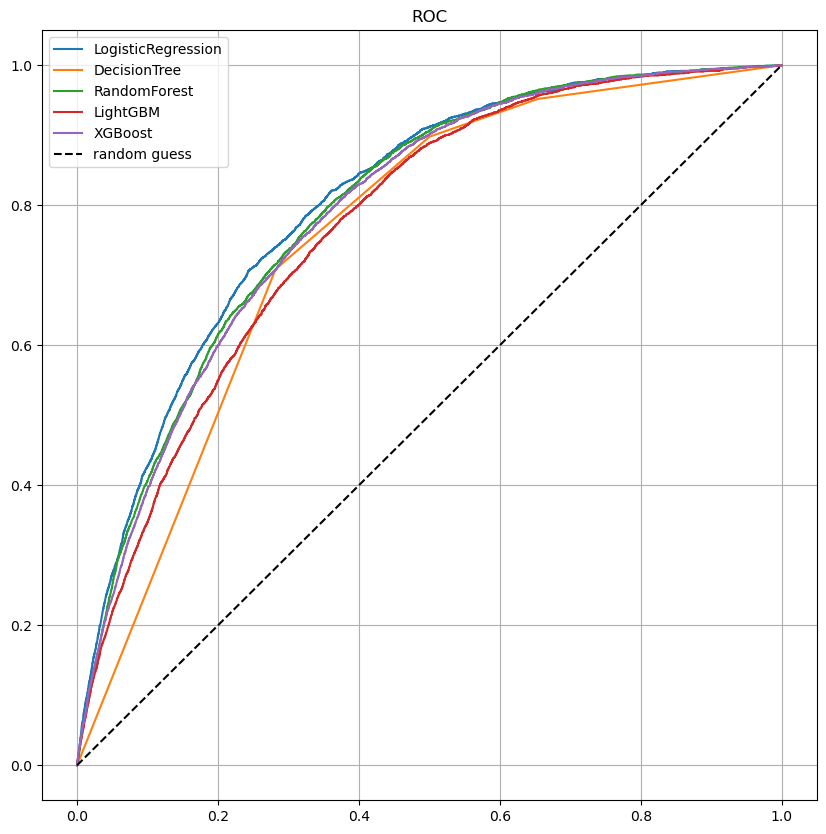

In [89]:
models = [lr_clf, dt, rf_clf, lgbm_clf, xgb_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM', 'XGBoost']
result = get_result_pd(models, model_names, X_train_ada, y_train_ada, X_test, y_test)

draw_roc_curve(models, model_names, X_test, y_test)

----

## 세 번째. SMOTETomek

In [84]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train_tomek, y_train_tomek = smoteto.fit_resample(X_train, y_train)

### Decision Tree

=> confusion matrix
[[40783 15994]
 [ 1455  3539]]
Accuracy: 0.7175, Precision: 0.1812
Recall: 0.7087, F1: 0.2886, AUC: 0.7135


=> classification_report

              precision    recall  f1-score   support

           0       0.97      0.72      0.82     56777
           1       0.18      0.71      0.29      4994

    accuracy                           0.72     61771
   macro avg       0.57      0.71      0.56     61771
weighted avg       0.90      0.72      0.78     61771



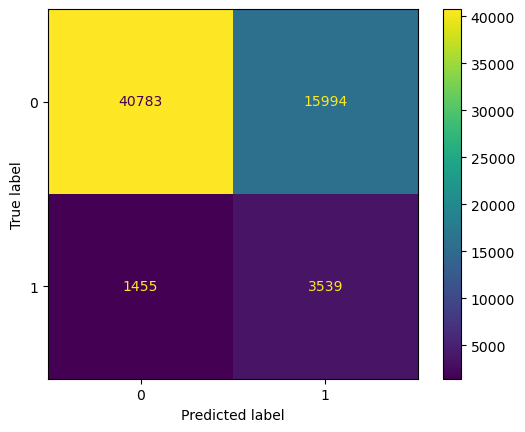

In [82]:
dt= DecisionTreeClassifier(random_state=13, max_depth=2)
dt.fit(X_train_tomek, y_train_tomek)
dt_pred = dt.predict(X_test)

print_clf_eval(y_test, dt_pred)

print('\n\n=> classification_report\n')
print(classification_report(y_test, dt_pred))

cm = confusion_matrix(y_test, dt_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)

disp.plot()
plt.show()

### Logistic Regresstion

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     56777
           1       0.20      0.72      0.31      4994

    accuracy                           0.75     61771
   macro avg       0.58      0.73      0.58     61771
weighted avg       0.91      0.75      0.80     61771



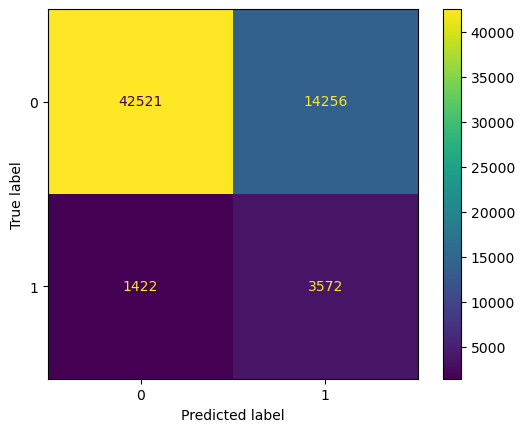

In [83]:
lr_clf = LogisticRegression(random_state=13, 
                            class_weight='balanced',
                            solver='liblinear')
lr_clf.fit(X_train_tomek, y_train_tomek)
lr_pred = lr_clf.predict(X_test)

print(classification_report(y_test, lr_pred))

cm = confusion_matrix(y_test, lr_pred, labels=lr_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_clf.classes_)


disp.plot()
plt.show()

### Random Forest

=> confusion matrix
[[41607 15170]
 [ 1491  3503]]
Accuracy: 0.7303, Precision: 0.1876
Recall: 0.7014, F1: 0.2960, AUC: 0.7171


=> classification_report

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     56777
           1       0.19      0.70      0.30      4994

    accuracy                           0.73     61771
   macro avg       0.58      0.72      0.56     61771
weighted avg       0.90      0.73      0.79     61771



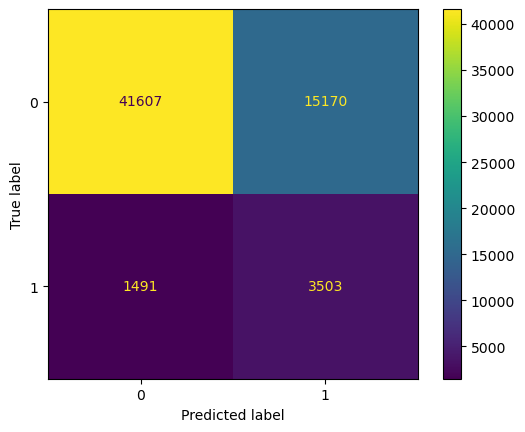

In [85]:
rf_clf = RandomForestClassifier(random_state=13, 
                                n_estimators=50,
                                max_depth=10,
                                min_samples_leaf=12,
                                min_samples_split=12,
                                n_jobs=-1,
                                class_weight='balanced')
rf_clf.fit(X_train_tomek, y_train_tomek)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

print('\n\n=> classification_report\n')
print(classification_report(y_test, rf_pred))

cm = confusion_matrix(y_test, rf_pred, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)

disp.plot()
plt.show()

### LGBM

[LightGBM] [Info] Number of positive: 227106, number of negative: 226216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 453322, number of used features: 7
=> confusion matrix
[[48971  7806]
 [ 2803  2191]]
Accuracy: 0.8283, Precision: 0.2192
Recall: 0.4387, F1: 0.2923, AUC: 0.6506


=> classification_report

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     56777
           1       0.22      0.44      0.29      4994

    accuracy                           0.83     61771
   macro avg       0.58      0.65      0.60     61771
weighted avg       0.89      0.83      0.85     61771



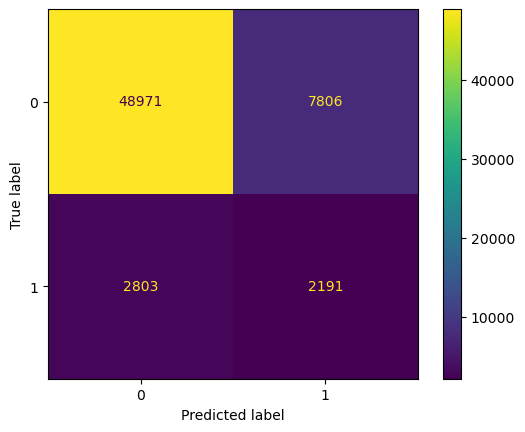

In [86]:

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, 
                            boost_from_average=False,
                            class_weight='balanced')
lgbm_clf.fit(X_train_tomek, y_train_tomek)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

print('\n\n=> classification_report\n')
print(classification_report(y_test, lgbm_pred))

cm = confusion_matrix(y_test, lgbm_pred, labels=lgbm_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm_clf.classes_)

disp.plot()
plt.show()

### XGBoost

=> confusion matrix
[[22156 34621]
 [  247  4747]]
Accuracy: 0.4355, Precision: 0.1206
Recall: 0.9505, F1: 0.2140, AUC: 0.6704


=> classification_report

              precision    recall  f1-score   support

           0       0.99      0.39      0.56     56777
           1       0.12      0.95      0.21      4994

    accuracy                           0.44     61771
   macro avg       0.55      0.67      0.39     61771
weighted avg       0.92      0.44      0.53     61771



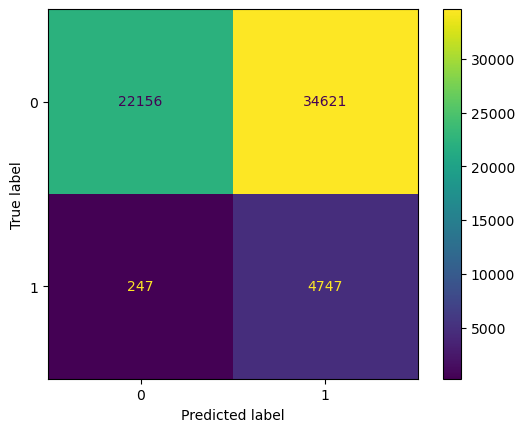

In [88]:
xgb_clf = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1),
    n_estimators=400,
    learning_rate=0.1, max_depth=3
)

xgb_clf.fit(X_train_tomek, y_train_tomek)
xgb_pred = xgb_clf.predict(X_test)

print_clf_eval(y_test, xgb_pred)

print('\n\n=> classification_report\n')
print(classification_report(y_test, xgb_pred))

cm = confusion_matrix(y_test, xgb_pred, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf.classes_)

disp.plot()
plt.show()

### ROC 곡선

[LightGBM] [Info] Number of positive: 227106, number of negative: 226216
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 453322, number of used features: 7


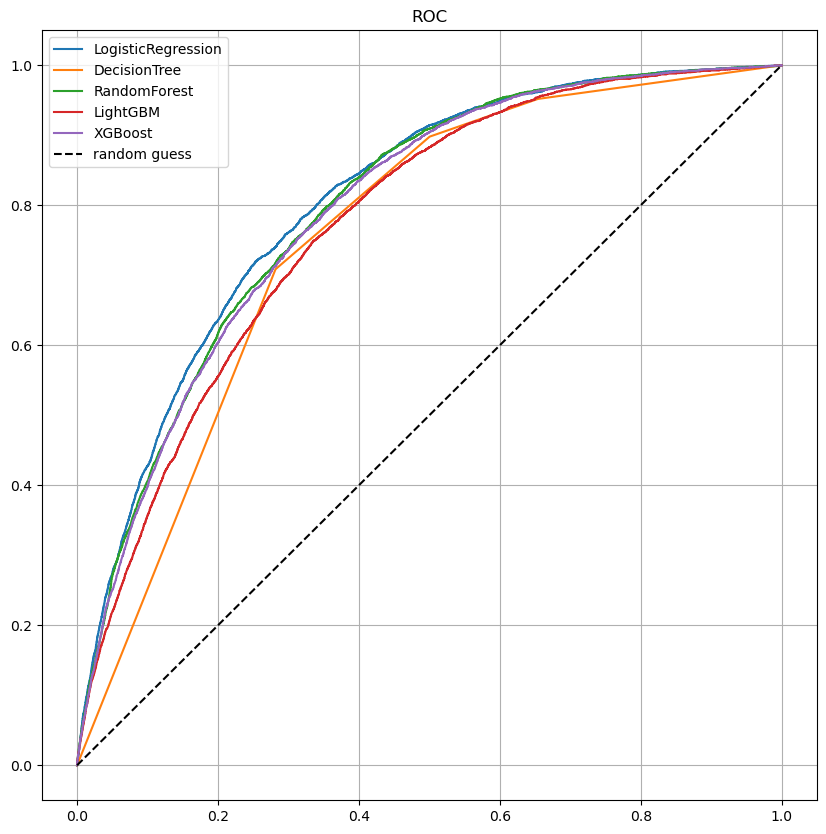

In [90]:
models = [lr_clf, dt, rf_clf, lgbm_clf, xgb_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LightGBM', 'XGBoost']
result = get_result_pd(models, model_names, X_train_tomek, y_train_tomek, X_test, y_test)

draw_roc_curve(models, model_names, X_test, y_test)

---

## 네 번째. Random oversampling

In [56]:
from imblearn.over_sampling import RandomOverSampler


randomoversampler = RandomOverSampler(random_state=13)

X_train_rdn, y_train_rdn = randomoversampler.fit_resample(X_train, y_train)

=> confusion matrix
[[40783 15994]
 [ 1455  3539]]
Accuracy: 0.7175, Precision: 0.1812
Recall: 0.7087, F1: 0.2886, AUC: 0.7135


=> classification_report

              precision    recall  f1-score   support

           0       0.97      0.72      0.82     56777
           1       0.18      0.71      0.29      4994

    accuracy                           0.72     61771
   macro avg       0.57      0.71      0.56     61771
weighted avg       0.90      0.72      0.78     61771



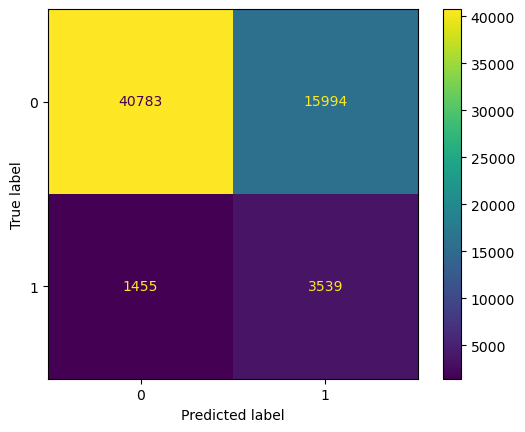

In [57]:



dt= DecisionTreeClassifier(random_state=13, max_depth=2)
dt.fit(X_train_rdn, y_train_rdn)
dt_pred = dt.predict(X_test)

print_clf_eval(y_test, dt_pred)

print('\n\n=> classification_report\n')
print(classification_report(y_test, dt_pred))

cm = confusion_matrix(y_test, dt_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)

disp.plot()
plt.show()

---